### Feature Description

1) objid = Object Identifier<br>
2) ra = J2000 Right Ascension (r-band)<br>
3) dec = J2000 Declination (r-band)<br>
4) Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.<br>

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.<br>
u - Ultravioliet, g - green, r - red, i-Near infrared, z - infrared

5) run = Run Number. run number, which identifies the specific scan,<br>
6) rereun = Rerun Number. An additional number, rerun, specifies how the image was processed. <br>
7) camcol = Camera column. the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run<br>
8) field = Field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.<br>
9) specobjid = Object Identifier<br>
10) class = object class (galaxy, star or quasar object)<br>
11) redshift = Final Redshift. , redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. <br>
12) plate = plate number<br>
13) mjd = MJD of observation. used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.<br>
14) fiberid = fiber ID. The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID. 

Column description Link 1 -> http://www.sdss3.org/dr9/imaging/imaging_basics.php<br>
Glossary -> http://www.sdss3.org/dr8/glossary.php<br>
u,g,r,i,z  bands -> https://astronomy.stackexchange.com/questions/18986/what-is-the-ugriz-magnitude-system



#### Skyserver dataset Astronomical object Classification
1) Read the dataset<br>
2) Remove/handle null values<br>
3) Depict class count on a pie chart<br>
4) Apply StandardScaling to the independent features and Label Encode the 'class' column<br>
5) Split the data into training and testing data data with test size=25%<br>
6) Apply the following classifier and generate the predicted value for testing dataset<br>
a) Decison Tree Classification<br>
b) Random Forest Classification<br>
c) KNN Classification<br>
d) SVM with different kernels<br>
7) Generate confusion matrix and classification report for all the models used in Q6<br>
8) Apply AdaBoost Classifier and generate predictions on test data. Generate Confusion matrix
and classification report.<br>
9) Apply XGBBoost Classifier and generate predictions on test data. Generate Confusion matrix 
and classification report.<br>

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1) Read the dataset
df = pd.read_csv(r".\Datasets\skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
# 2) Remove/handle null values
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

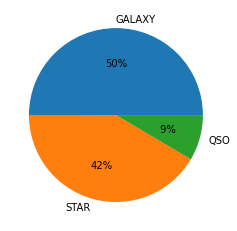

In [4]:
# 3) Depict class count on a pie chart
x = df["class"].value_counts()
labels=["GALAXY","STAR","QSO"]
plt.pie(x,labels=labels,autopct="%2.0f%%");

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
# 4) Apply StandardScaling to the independent features and Label Encode the 'class' column
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [7]:
X = df.drop(["class"],axis=1)
col = X.columns
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=col)
X.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,-0.838061,0.0,0.210852,-0.217630,1.031501,-0.369731,1.031489,1.309311,0.668632
1,0.0,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,-0.838061,0.0,0.210852,-0.217630,-0.636183,-0.369849,-0.636213,-0.879197,0.911012
2,0.0,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,-0.838061,0.0,0.210852,-0.211479,-0.656313,-0.053027,-0.656339,-0.609191,0.775279
3,0.0,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,-0.838061,0.0,0.210852,-0.205328,1.031506,-0.369993,1.031489,1.309311,0.760736
4,0.0,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,-0.838061,0.0,0.210852,-0.205328,1.031506,-0.368189,1.031489,1.309311,0.770431


In [8]:
y = df["class"]
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

In [9]:
# 5) Split the data into training and testing data data with test size=25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 17), (2500, 17), (7500,), (2500,))

In [10]:
# 6) Apply the following classifier and generate the predicted value for testing dataset
# a) Decison Tree Classification
# b) Random Forest Classification
# c) KNN Classification
# d) SVM with different kernels
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [11]:
preds = {}
scores = {}
models = {"DT":DecisionTreeClassifier(),
          "RF":RandomForestClassifier(),
          "KNN":KNeighborsClassifier(),
          "SVM_L":SVC(kernel="linear"),
          "SVM_R":SVC(kernel="rbf"),
          "SVM_P":SVC(kernel="poly")}
for name, model in models.items():
    model.fit(X_train,y_train)
    scores[name] = model.score(X_test,y_test)
    preds[name] = model.predict(X_test)
scores

{'DT': 0.9832,
 'RF': 0.9864,
 'KNN': 0.9032,
 'SVM_L': 0.9832,
 'SVM_R': 0.9516,
 'SVM_P': 0.9176}

In [12]:
preds_df = pd.DataFrame(preds)
preds_df.tail()

,DT,RF,KNN,SVM_L,SVM_R,SVM_P
2495,0,0,0,0,0,0
2496,0,0,0,0,0,0
2497,2,2,0,2,0,0
2498,2,2,2,2,2,2
2499,0,0,0,0,0,0


In [13]:
# 7) Generate confusion matrix and classification report for all the models used in Q6
from sklearn.metrics import confusion_matrix, classification_report
cm1 = confusion_matrix(y_test,preds_df.DT)
cm2 = confusion_matrix(y_test,preds_df.RF)
cm3 = confusion_matrix(y_test,preds_df.KNN)
cm4 = confusion_matrix(y_test,preds_df.SVM_L)
cm5 = confusion_matrix(y_test,preds_df.SVM_R)
cm6 = confusion_matrix(y_test,preds_df.SVM_P)
print(f"For Decision Tree:\n{cm1}\n{classification_report(y_test,preds_df.DT)}\n")
print(f"For Random Forest:\n{cm2}\n{classification_report(y_test,preds_df.RF)}\n")
print(f"For KNN:\n{cm3}\n{classification_report(y_test,preds_df.KNN)}\n")
print(f"For SVM with Linear Kernel:\n{cm4}\n{classification_report(y_test,preds_df.SVM_L)}\n")
print(f"For SVM with RBF Kernel:\n{cm5}\n{classification_report(y_test,preds_df.SVM_R)}\n")
print(f"For SVM with Poly Kernel:\n{cm6}\n{classification_report(y_test,preds_df.SVM_P)}\n")

For Decision Tree:
[[1242   16    0]
 [  19  212    1]
 [   6    0 1004]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1258
           1       0.93      0.91      0.92       232
           2       1.00      0.99      1.00      1010

    accuracy                           0.98      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.98      0.98      0.98      2500


For Random Forest:
[[1244    6    8]
 [  16  215    1]
 [   3    0 1007]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1258
           1       0.97      0.93      0.95       232
           2       0.99      1.00      0.99      1010

    accuracy                           0.99      2500
   macro avg       0.98      0.97      0.98      2500
weighted avg       0.99      0.99      0.99      2500


For KNN:
[[1199    2   57]
 [  25  196   11]
 [ 145    2  863]]
              precision 

In [14]:
# 8) Apply AdaBoost Classifier and generate predictions on test data. Generate Confusion matrix and classification report.
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy'))
abc.fit(X_train,y_train)
print(abc.score(X_test,y_test))
abc_preds = abc.predict(X_test)
abc_preds[:20]

0.9876


array([0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2])

In [15]:
print(confusion_matrix(y_test, abc_preds))
print(classification_report(y_test,abc_preds))

[[1243    6    9]
 [  13  218    1]
 [   2    0 1008]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1258
           1       0.97      0.94      0.96       232
           2       0.99      1.00      0.99      1010

    accuracy                           0.99      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500



In [16]:
# 9) Apply XGBBoost Classifier and generate predictions on test data. Generate Confusion matrix and classification report.
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
print(xgbc.score(X_test,y_test))
xgbc_preds = xgbc.predict(X_test)
xgbc_preds[:20]

[03:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9884


array([0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2])

In [17]:
print(confusion_matrix(y_test, xgbc_preds))
print(classification_report(y_test,xgbc_preds))

[[1249    7    2]
 [  14  217    1]
 [   5    0 1005]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1258
           1       0.97      0.94      0.95       232
           2       1.00      1.00      1.00      1010

    accuracy                           0.99      2500
   macro avg       0.98      0.97      0.98      2500
weighted avg       0.99      0.99      0.99      2500

